In [150]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [174]:
results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/common_train/0722180200pm/testing/results/"
npy_file_pck = 'test_pck_ep65_nTest_5000_time072520181035.npy'
npy_file_pckh = 'test_pckh_ep65_nTest_5000_time072520181035.npy'

# pck
pck = np.load(os.path.join(results_dir, npy_file_pck))
print("pck\n")
pprint.pprint(pck)
# pck_at = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
pck_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pck_at\n", pck_at)

# pckh
pckh = np.load(os.path.join(results_dir, npy_file_pckh))
print("\npckh\n")
pprint.pprint(pckh)
pckh_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pckh_at\n", pckh_at)


joints = ['Head', 'Spine_Shoulder (Neck)', 'Left Shoulder', 'Left Elbow', 'Left Wrist', 'Right Shoulder', 'Right Elbow', 'Right Wrist', 'Left Hip', 'Right Hip']
print("\njoints", joints)

pck

array([[0.    , 0.0304, 0.3904, 0.9548, 0.9896, 0.996 , 0.998 , 0.9982,
        0.9984, 0.9984, 0.9984, 0.9986, 1.    , 1.    , 1.    , 1.    ],
       [0.    , 0.0294, 0.218 , 0.7362, 0.8994, 0.9664, 0.9868, 0.9936,
        0.9976, 0.9984, 0.9992, 0.9992, 0.9992, 0.9992, 1.    , 1.    ],
       [0.    , 0.031 , 0.2942, 0.9166, 0.9818, 0.993 , 0.9972, 0.9982,
        0.9988, 0.999 , 0.9992, 0.9992, 0.9992, 0.9998, 1.    , 1.    ],
       [0.    , 0.0844, 0.3498, 0.8234, 0.9014, 0.942 , 0.9706, 0.983 ,
        0.9884, 0.9908, 0.995 , 0.998 , 0.9992, 0.9992, 0.9992, 0.9992],
       [0.    , 0.0616, 0.2396, 0.5438, 0.6546, 0.7504, 0.8054, 0.8414,
        0.8662, 0.8866, 0.9178, 0.9316, 0.9368, 0.941 , 0.9444, 0.947 ],
       [0.    , 0.0616, 0.3364, 0.8768, 0.9548, 0.978 , 0.9852, 0.9876,
        0.9884, 0.9888, 0.9896, 0.9902, 0.9908, 0.9908, 0.9908, 0.991 ],
       [0.    , 0.0416, 0.274 , 0.7774, 0.8682, 0.9212, 0.9496, 0.962 ,
        0.9694, 0.9758, 0.9816, 0.985 , 0.986 , 0.986

(5, 2)


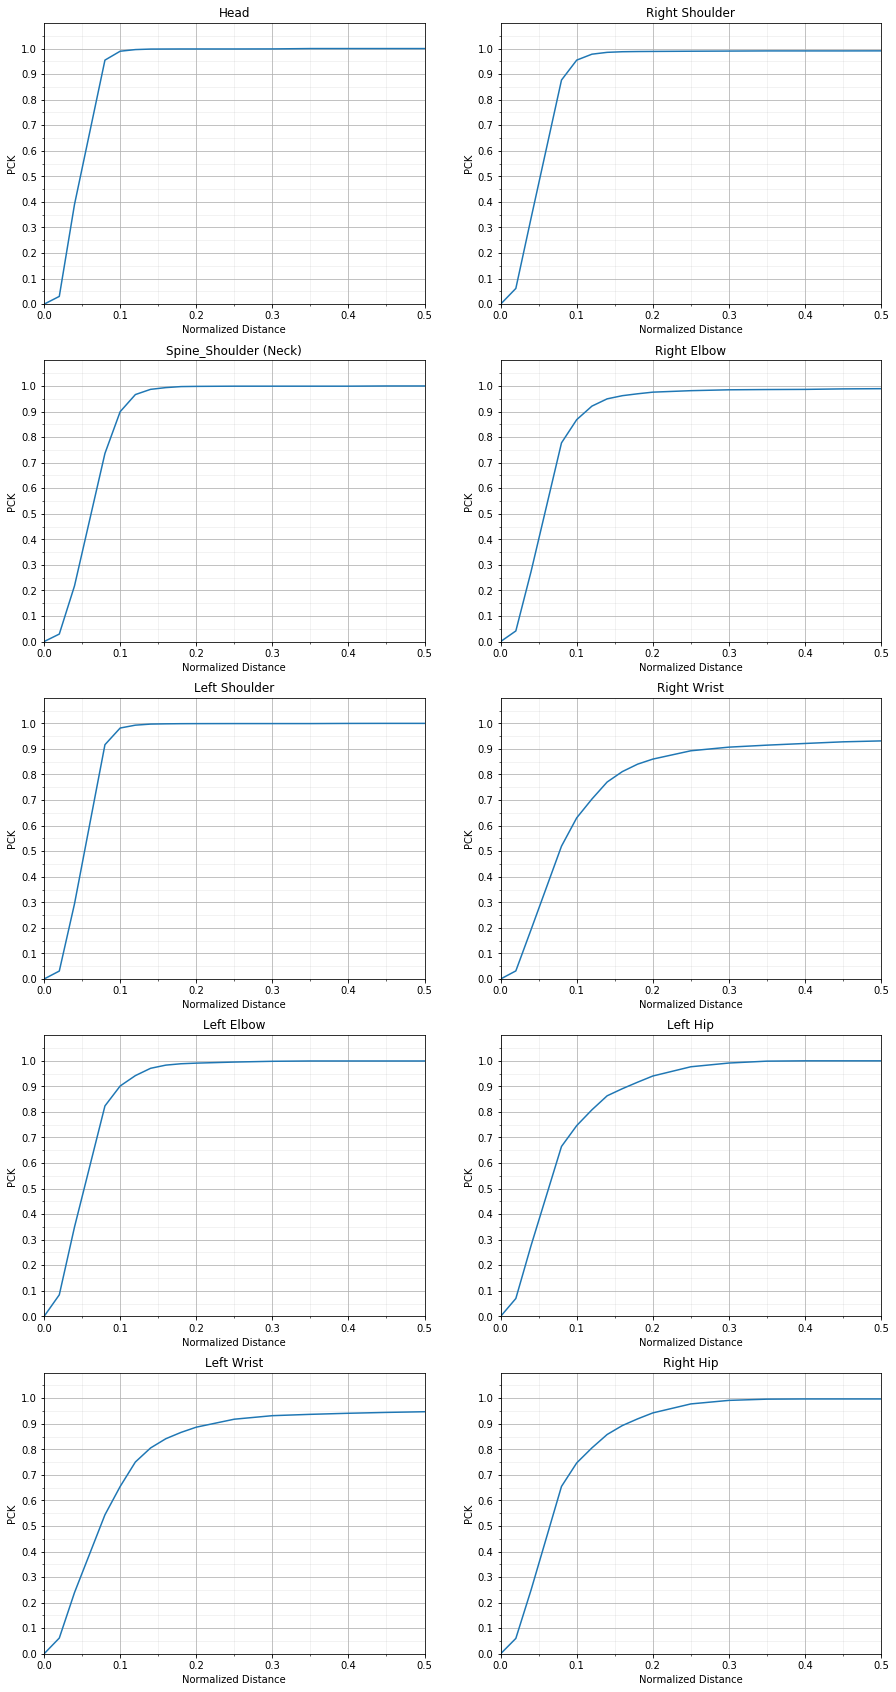

In [175]:
##### pck
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
# ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()
fig.set_size_inches((15, 30))

x = pck_at
x_label = "Normalized Distance"
y_label = "PCK"

# # 1 head
# y = pck[0]
# ax0.plot(x,y)
# # ax0.legend(prop={'size': 10})
# ax0.set(xlabel=x_label, ylabel=y_label, title='Head')
# ax0.grid()

for p in range(pck.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pck[p]
#     ax[p].imshow(np.zeros((10,10)))
    
    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

    
# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_individual_joints.png"))

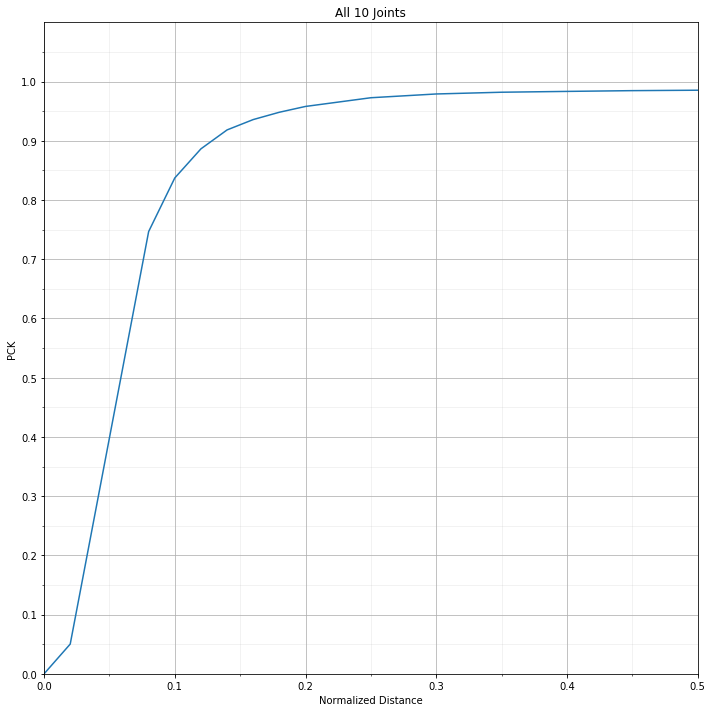

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pck_at
x_label = "Normalized Distance"
y_label = "PCK"

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pck, axis=0)
ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_all.png"))


(5, 2)


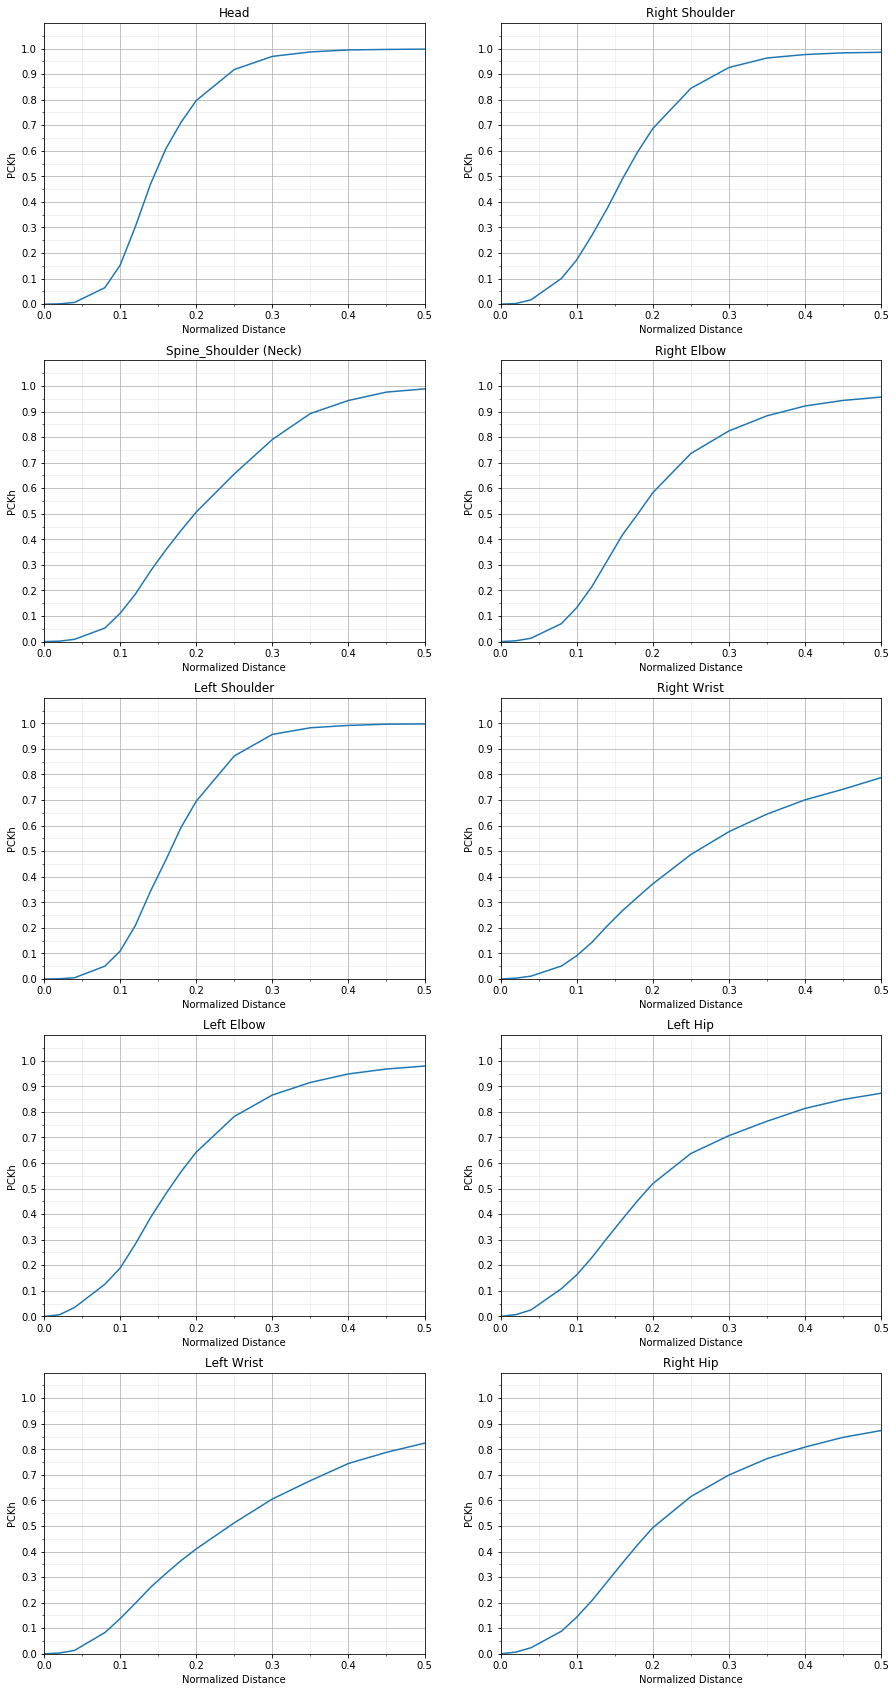

In [177]:
##### pckh
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
fig.set_size_inches((15, 30))

x = pckh_at
x_label = "Normalized Distance"
y_label = "PCKh"
for p in range(pckh.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pckh[p]

    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_individual_joints.png"))

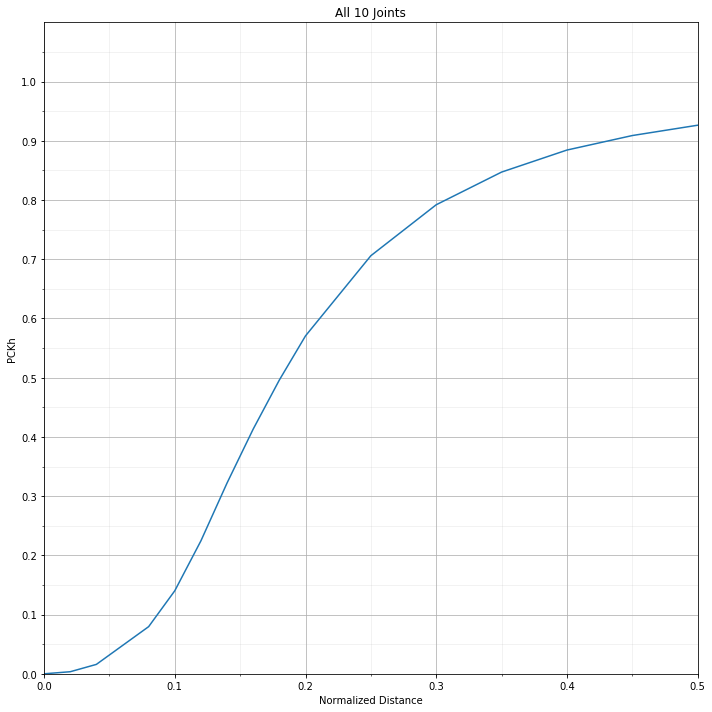

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pckh_at
x_label = "Normalized Distance"
y_label = "PCKh"

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pckh, axis=0)
ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_all.png"))
